In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import cv2
import tensorflow.keras as keras
import tensorflow as tf
from keras.models import Sequential
from keras import layers
from keras import optimizers
from keras.layers.convolutional import MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.layers import BatchNormalization
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dropout

In [6]:
# 얼리스탑핑 쉽게
def model_save_erstp(MODEL_SAVE_FOLDER_PATH, model_name, patience):
    save_file_name = model_name
    cb_checkpoint,cb_earlystopping = checkpoint_ez(MODEL_SAVE_FOLDER_PATH, save_file_name, patience)
    return cb_checkpoint,cb_earlystopping

def checkpoint_ez(MODEL_SAVE_FOLDER_PATH,save_file_name, patience) : 
    MODEL_SAVE_FOLDER_PATH = MODEL_SAVE_FOLDER_PATH
    data_name = save_file_name
    model_path = MODEL_SAVE_FOLDER_PATH + data_name + '.hdf5'
    # val_loss 값이 낮아졌을(좋아졌을) 때만 저장
    cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss',
                                    verbose=1, save_best_only=True
                                   )
    cb_earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience = patience, verbose=1,
                                                  mode='auto', baseline=None, restore_best_weights=False)
    return cb_checkpoint, cb_earlystopping

# 그래프 쉽게
def loss_graph(label1,label2,bottom,top):
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()
    loss_ax.plot(history.history['loss'], 'y', label=label1)
    loss_ax.plot(history.history['val_loss'], 'r', label=label2)
    acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    # acc_ax.set_ylabel('accuray')
    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')
    loss_ax.set_ylim(bottom,top)
    return plt.show()

# 모델 저장 def
def json_model_saver(MODEL_SAVE_FOLDER_PATH,file_name):
    # model save by json
    # load model 
    model = keras.models.load_model(MODEL_SAVE_FOLDER_PATH +file_name+ '.hdf5')
    # Save model with json format
    model_json = model.to_json()
    with open(MODEL_SAVE_FOLDER_PATH+file_name+'.json', "w") as json_file:
        json_file.write(model_json)
    # Save weight with h5 format
    model.save_weights( MODEL_SAVE_FOLDER_PATH +file_name +'.h5')
    return print("Saved model to disk : "+ file_name +'.h5')


In [7]:
path = '../9.data/1.accData_split/1.diff_heatmap/accident/'
path_no = '../9.data/1.accData_split/1.diff_heatmap/nonaccident/'

In [8]:
accList = os.listdir(path)
nonList = os.listdir(path_no)

In [9]:
returnNum = 0
for i in accList:
    if returnNum == 0:
        accImg = cv2.imread(path+i)
        accImg = cv2.resize(accImg, None, fx=0.1, fy=0.1, interpolation=cv2.INTER_AREA)
        accImg = np.ravel(accImg)
        accImg = np.expand_dims(accImg, 0)
        returnNum += 1
    else:
        temp = cv2.imread(path+i)
        temp = cv2.resize(temp, None, fx=0.1, fy=0.1, interpolation=cv2.INTER_AREA)
        temp = np.ravel(temp)
        temp = np.expand_dims(temp, 0)
        accImg = np.concatenate((accImg, temp), axis=0)
        
returnNum = 0
for i in nonList:
    if returnNum == 0:
        nonImg = cv2.imread(path_no+i)
        nonImg = cv2.resize(nonImg, None, fx=0.1, fy=0.1, interpolation=cv2.INTER_AREA)
        nonImg = np.ravel(nonImg)
        nonImg = np.expand_dims(nonImg, 0)
        returnNum += 1
    else:
        temp = cv2.imread(path_no+i)
        temp = cv2.resize(temp, None, fx=0.1, fy=0.1, interpolation=cv2.INTER_AREA)
        temp = np.ravel(temp)
        temp = np.expand_dims(temp, 0)
        nonImg = np.concatenate((nonImg, temp), axis=0)

In [10]:
accY = np.ones(1000)
nonY = np.zeros(1000)

In [11]:
dataX = np.concatenate([accImg, nonImg])
dataY = np.concatenate([accY, nonY])

In [12]:
dataX = dataX/255

np.random.seed(0)
randomList = list(np.random.randint(2000, size = 2000))
dataX = dataX[randomList]
dataY = dataY[randomList]

In [13]:
nTrain = 1500
nTest = 500

x_train = dataX[:nTrain]
x_test = dataX[nTrain:]
y_train = dataY[:nTrain]
y_test = dataY[nTrain:]

In [14]:
# 데이터 reshape 및 차원 추가
x_train = x_train.reshape(x_train.shape[0],167,240,3)
x_test = x_test.reshape(x_test.shape[0],167,240,3)

In [15]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [16]:
y_train.shape

(1500, 2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 163, 236, 2)       152       
_________________________________________________________________
flatten (Flatten)            (None, 76936)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 153874    
Total params: 154,026
Trainable params: 154,026
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
113/120 [===========================>..] - ETA: 0s - loss: 0.3160 - accuracy: 0.9451
Epoch 00001: val_loss improved from inf to 0.00987, saving model to ../1.model\model1.hdf5
120/120 [==============================] - 1s 9ms/step - loss: 0.2984 - accuracy: 0.9483 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 2/1000
118/120 [============================>.] - ETA:

Epoch 25/1000
114/120 [===========================>..] - ETA: 0s - loss: 4.7073e-05 - accuracy: 1.0000
Epoch 00025: val_loss improved from 0.00030 to 0.00025, saving model to ../1.model\model1.hdf5
120/120 [==============================] - 1s 7ms/step - loss: 4.5720e-05 - accuracy: 1.0000 - val_loss: 2.4665e-04 - val_accuracy: 1.0000
Epoch 26/1000
119/120 [============================>.] - ETA: 0s - loss: 4.1085e-05 - accuracy: 1.0000
Epoch 00026: val_loss did not improve from 0.00025
120/120 [==============================] - 1s 7ms/step - loss: 4.1296e-05 - accuracy: 1.0000 - val_loss: 3.3658e-04 - val_accuracy: 1.0000
Epoch 27/1000
116/120 [============================>.] - ETA: 0s - loss: 2.3534e-05 - accuracy: 1.0000
Epoch 00027: val_loss did not improve from 0.00025
120/120 [==============================] - 1s 7ms/step - loss: 3.6140e-05 - accuracy: 1.0000 - val_loss: 3.1402e-04 - val_accuracy: 1.0000
Epoch 28/1000
116/120 [============================>.] - ETA: 0s - loss: 3.51

Epoch 52/1000
120/120 [==============================] - ETA: 0s - loss: 7.0175e-06 - accuracy: 1.0000
Epoch 00052: val_loss did not improve from 0.00009
120/120 [==============================] - 1s 7ms/step - loss: 7.0175e-06 - accuracy: 1.0000 - val_loss: 1.0255e-04 - val_accuracy: 1.0000
Epoch 53/1000
112/120 [===========================>..] - ETA: 0s - loss: 5.9475e-06 - accuracy: 1.0000
Epoch 00053: val_loss did not improve from 0.00009
120/120 [==============================] - 1s 7ms/step - loss: 6.0295e-06 - accuracy: 1.0000 - val_loss: 1.3522e-04 - val_accuracy: 1.0000
Epoch 54/1000
114/120 [===========================>..] - ETA: 0s - loss: 6.0246e-06 - accuracy: 1.0000
Epoch 00054: val_loss did not improve from 0.00009
120/120 [==============================] - 1s 8ms/step - loss: 5.8167e-06 - accuracy: 1.0000 - val_loss: 9.4854e-05 - val_accuracy: 1.0000
Epoch 55/1000
116/120 [============================>.] - ETA: 0s - loss: 5.3703e-06 - accuracy: 1.0000
Epoch 00055: val_l

Epoch 79/1000
118/120 [============================>.] - ETA: 0s - loss: 1.1719e-06 - accuracy: 1.0000
Epoch 00079: val_loss did not improve from 0.00003
120/120 [==============================] - 1s 7ms/step - loss: 1.1615e-06 - accuracy: 1.0000 - val_loss: 6.1359e-05 - val_accuracy: 1.0000
Epoch 80/1000
120/120 [==============================] - ETA: 0s - loss: 1.0970e-06 - accuracy: 1.0000
Epoch 00080: val_loss did not improve from 0.00003
120/120 [==============================] - 1s 7ms/step - loss: 1.0970e-06 - accuracy: 1.0000 - val_loss: 4.5780e-05 - val_accuracy: 1.0000
Epoch 81/1000
115/120 [===========================>..] - ETA: 0s - loss: 9.7933e-07 - accuracy: 1.0000
Epoch 00081: val_loss did not improve from 0.00003
120/120 [==============================] - 1s 7ms/step - loss: 9.6540e-07 - accuracy: 1.0000 - val_loss: 4.0886e-05 - val_accuracy: 1.0000
Epoch 82/1000
118/120 [============================>.] - ETA: 0s - loss: 9.7439e-07 - accuracy: 1.0000
Epoch 00082: val_l

Epoch 107/1000
120/120 [==============================] - ETA: 0s - loss: 1.7589e-07 - accuracy: 1.0000
Epoch 00107: val_loss improved from 0.00003 to 0.00003, saving model to ../1.model\model1.hdf5
120/120 [==============================] - 1s 8ms/step - loss: 1.7589e-07 - accuracy: 1.0000 - val_loss: 2.7720e-05 - val_accuracy: 1.0000
Epoch 108/1000
115/120 [===========================>..] - ETA: 0s - loss: 1.8903e-07 - accuracy: 1.0000
Epoch 00108: val_loss did not improve from 0.00003
120/120 [==============================] - 1s 7ms/step - loss: 1.8241e-07 - accuracy: 1.0000 - val_loss: 3.0792e-05 - val_accuracy: 1.0000
Epoch 109/1000
116/120 [============================>.] - ETA: 0s - loss: 1.6253e-07 - accuracy: 1.0000
Epoch 00109: val_loss did not improve from 0.00003
120/120 [==============================] - 1s 7ms/step - loss: 1.6159e-07 - accuracy: 1.0000 - val_loss: 6.4736e-05 - val_accuracy: 1.0000
Epoch 110/1000
119/120 [============================>.] - ETA: 0s - loss: 

118/120 [============================>.] - ETA: 0s - loss: 3.5236e-08 - accuracy: 1.0000
Epoch 00134: val_loss did not improve from 0.00002
120/120 [==============================] - 1s 7ms/step - loss: 3.4804e-08 - accuracy: 1.0000 - val_loss: 3.2744e-05 - val_accuracy: 1.0000
Epoch 135/1000
117/120 [============================>.] - ETA: 0s - loss: 3.3770e-08 - accuracy: 1.0000
Epoch 00135: val_loss did not improve from 0.00002
120/120 [==============================] - 1s 7ms/step - loss: 3.3187e-08 - accuracy: 1.0000 - val_loss: 5.2562e-05 - val_accuracy: 1.0000
Epoch 136/1000
117/120 [============================>.] - ETA: 0s - loss: 2.7348e-08 - accuracy: 1.0000
Epoch 00136: val_loss did not improve from 0.00002
120/120 [==============================] - 1s 7ms/step - loss: 2.6876e-08 - accuracy: 1.0000 - val_loss: 2.7031e-05 - val_accuracy: 1.0000
Epoch 137/1000
113/120 [===========================>..] - ETA: 0s - loss: 2.7230e-08 - accuracy: 1.0000
Epoch 00137: val_loss did not

Epoch 162/1000
114/120 [===========================>..] - ETA: 0s - loss: 6.2168e-09 - accuracy: 1.0000
Epoch 00162: val_loss did not improve from 0.00002
120/120 [==============================] - 1s 7ms/step - loss: 6.0174e-09 - accuracy: 1.0000 - val_loss: 3.5419e-05 - val_accuracy: 1.0000
Epoch 163/1000
120/120 [==============================] - ETA: 0s - loss: 5.4574e-09 - accuracy: 1.0000
Epoch 00163: val_loss did not improve from 0.00002
120/120 [==============================] - 1s 7ms/step - loss: 5.4574e-09 - accuracy: 1.0000 - val_loss: 3.5029e-05 - val_accuracy: 1.0000
Epoch 164/1000
116/120 [============================>.] - ETA: 0s - loss: 5.3359e-09 - accuracy: 1.0000
Epoch 00164: val_loss did not improve from 0.00002
120/120 [==============================] - 1s 7ms/step - loss: 5.1951e-09 - accuracy: 1.0000 - val_loss: 2.6771e-05 - val_accuracy: 1.0000
Epoch 165/1000
119/120 [============================>.] - ETA: 0s - loss: 5.2196e-09 - accuracy: 1.0000
Epoch 00165: v

Epoch 190/1000
115/120 [===========================>..] - ETA: 0s - loss: 1.4775e-09 - accuracy: 1.0000
Epoch 00190: val_loss did not improve from 0.00001
120/120 [==============================] - 1s 7ms/step - loss: 1.4570e-09 - accuracy: 1.0000 - val_loss: 2.2518e-05 - val_accuracy: 1.0000
Epoch 191/1000
116/120 [============================>.] - ETA: 0s - loss: 1.3768e-09 - accuracy: 1.0000
Epoch 00191: val_loss did not improve from 0.00001
120/120 [==============================] - 1s 7ms/step - loss: 1.3587e-09 - accuracy: 1.0000 - val_loss: 2.6768e-05 - val_accuracy: 1.0000
Epoch 192/1000
115/120 [===========================>..] - ETA: 0s - loss: 1.4302e-09 - accuracy: 1.0000
Epoch 00192: val_loss did not improve from 0.00001
120/120 [==============================] - 1s 7ms/step - loss: 1.3982e-09 - accuracy: 1.0000 - val_loss: 1.6895e-05 - val_accuracy: 1.0000
Epoch 193/1000
117/120 [============================>.] - ETA: 0s - loss: 1.1849e-09 - accuracy: 1.0000
Epoch 00193: v

Epoch 218/1000
117/120 [============================>.] - ETA: 0s - loss: 5.1922e-10 - accuracy: 1.0000
Epoch 00218: val_loss did not improve from 0.00001
120/120 [==============================] - 1s 7ms/step - loss: 5.0625e-10 - accuracy: 1.0000 - val_loss: 1.7308e-05 - val_accuracy: 1.0000
Epoch 219/1000
120/120 [==============================] - ETA: 0s - loss: 5.3190e-10 - accuracy: 1.0000
Epoch 00219: val_loss did not improve from 0.00001
120/120 [==============================] - 1s 7ms/step - loss: 5.3190e-10 - accuracy: 1.0000 - val_loss: 4.2713e-05 - val_accuracy: 1.0000
Epoch 220/1000
115/120 [===========================>..] - ETA: 0s - loss: 5.3530e-10 - accuracy: 1.0000
Epoch 00220: val_loss did not improve from 0.00001
120/120 [==============================] - 1s 7ms/step - loss: 5.1632e-10 - accuracy: 1.0000 - val_loss: 1.8520e-05 - val_accuracy: 1.0000
Epoch 221/1000
118/120 [============================>.] - ETA: 0s - loss: 4.5852e-10 - accuracy: 1.0000
Epoch 00221: v

Epoch 247/1000
113/120 [===========================>..] - ETA: 0s - loss: 0.0031 - accuracy: 0.9991    
Epoch 00247: val_loss did not improve from 0.00001
120/120 [==============================] - 1s 7ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 248/1000
117/120 [============================>.] - ETA: 0s - loss: 0.0028 - accuracy: 0.9991    
Epoch 00248: val_loss did not improve from 0.00001
120/120 [==============================] - 1s 7ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 6.5202e-04 - val_accuracy: 1.0000
Epoch 249/1000
115/120 [===========================>..] - ETA: 0s - loss: 0.0026 - accuracy: 0.9991
Epoch 00249: val_loss did not improve from 0.00001
120/120 [==============================] - 1s 7ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 2.8615e-04 - val_accuracy: 1.0000
Epoch 250/1000
118/120 [============================>.] - ETA: 0s - loss: 0.0026 - accuracy: 0.9992
Epoch 00250: val_loss did not improve 

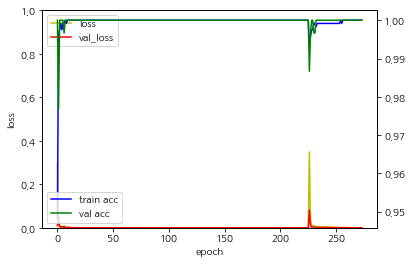

Saved model to disk : model1.h5


In [21]:
model_name = 'model1'
MODEL_SAVE_FOLDER_PATH = '../1.model/'
cb_checkpoint,cb_earlystopping = model_save_erstp(MODEL_SAVE_FOLDER_PATH, model_name, 50)

tf.keras.backend.clear_session()


model = Sequential()
model.add(layers.Conv2D(filters=2, kernel_size = 5 , input_shape=(167,240,3), activation='relu', kernel_initializer='he_normal')) 
model.add(layers.Flatten())
model.add(layers.Dense(units=2, activation='sigmoid'))
model.compile(loss ='binary_crossentropy', optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, shuffle=True,epochs=1000, batch_size=10, validation_split=0.2, callbacks=[cb_checkpoint,cb_earlystopping])
loss_graph('loss','val_loss',0,1)

# 모델 저장
file_name = model_name
json_model_saver(MODEL_SAVE_FOLDER_PATH,file_name)

In [22]:
loss, acc = model.evaluate(x_test, y_test)

16/16 [==============================] - 0s 9ms/step - loss: 0.0195 - accuracy: 0.9960


In [198]:
y_test

,0.0,1.0
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
495,1,0
496,1,0
497,0,1
498,1,0


In [207]:
import matplotlib.pyplot as plt

plt.imshow(test[10])

NameError: name 'test' is not defined

In [121]:
test[0].shape

(51, 11)

In [120]:
img.shape

(1670, 2400, 3)

In [78]:
accPath = '../9.data/1.accData_split/1.diff_heatmap/accident/'
nonaccPath = '../9.data/1.accData_split/1.diff_heatmap/nonaccident/'

acc_list = os.listdir(accPath)
nonacc_list = os.listdir(nonaccPath)

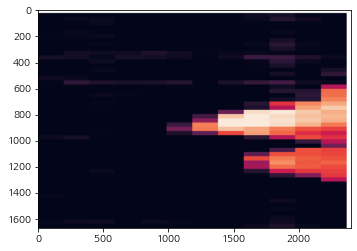

In [122]:
img = cv2.imread(accPath + acc_list[50])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [102]:
num = 0
for i in acc_list:    
    if num == 0:
        img = cv2.imread(accPath + i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        x_train = np.expand_dims(img, 0)
        num += 1
    else:
        img = cv2.imread(accPath + i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = np.expand_dims(img, 0)
        x_train = np.concatenate((x_train, img), axis=0)


KeyboardInterrupt: 

TypeError: Invalid shape (1, 1670, 2400, 3) for image data

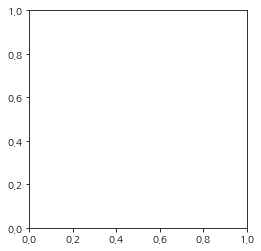

In [103]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [113]:
img = cv2.imread(accPath + acc_list[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)